<a href="https://colab.research.google.com/github/neeluvermaiitj/Autoencoder-and-PCA-comparision/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np

print(__doc__)

from sklearn.model_selection import train_test_split

import numpy as np
import cv2
import glob
filenames = [img for img in glob.glob("./lfw/George_W_Bush/*.jpg")]

filenames.sort()
print(len(filenames))
images = []
for faces in filenames:
    n= cv2.imread(faces,0)
    images.append(n)
    #print(faces)

X = np.array(images)
print(X.shape)
n_samples, h, w = X.shape
n_features = X.shape[0]

X = X.reshape(530,62500)

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)

train, test = train_test_split(X, test_size=0.1, random_state=42)
X_train, X_val = train_test_split(train, test_size=0.2, random_state=42)

X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.
X_test = test.astype('float32') / 255.

print("Training images size:",len(X_train))
print("Validation images size:",len(X_val))
print("Testing images size:",len(X_test))

print("Training images shape:",X_train.shape)
print("validation images shape:", X_val.shape )
print("Testing images shape:", X_test.shape)


Automatically created module for IPython interactive environment
530
(530, 250, 250)
Total dataset size:
n_samples: 530
n_features: 530
Training images size: 381
Validation images size: 96
Testing images size: 53
Training images shape: (381, 62500)
validation images shape: (96, 62500)
Testing images shape: (53, 62500)


In [ ]:
pca = PCA(.99)
X_train_pca = pca.fit_transform(X_train) 
proj = pca.inverse_transform(X_train_pca)

In [ ]:
comp = pca.components_ 
com_tr = np.transpose(pca.components_) 
proj = np.dot(X_train,com_tr)
recon = np.dot(proj,comp) 
"""  MSE Error """
print( "MSE loss on traning set: = %.6G" %(np.mean((X_train - recon)**2)))

comp = pca.components_ 
com_tr = np.transpose(pca.components_)
proj = np.dot(X_val,com_tr)
recon = np.dot(proj,comp) 
"""  MSE Error """
print( "MSE loss on validation set: = %.6G" %(np.mean((X_val - recon)**2)))

comp = pca.components_ 
com_tr = np.transpose(pca.components_) 
proj = np.dot(X_test,com_tr)
recon = np.dot(proj,comp) 
"""  MSE Error """
print( "MSE loss on test set= %.6G" %(np.mean((X_test - recon)**2)))

MSE loss on traning set: = 0.00206032
MSE loss on validation set: = 0.010891
MSE loss on test set= 0.0104066


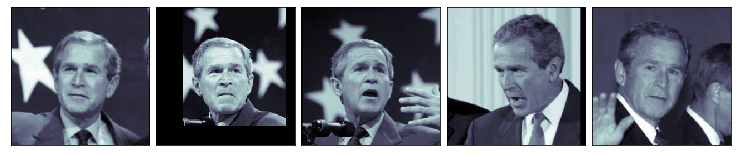

In [ ]:
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 pixels 
for i in range(5): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest') 
plt.show() 

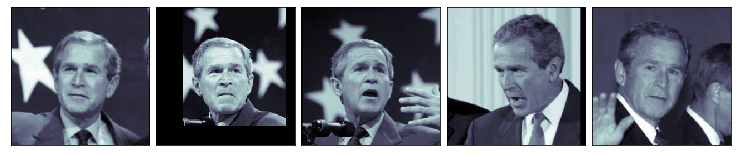

(53, 53)
[0.28457293 0.37143892 0.43604743 0.48917338 0.5344047  0.5693017
 0.5962816  0.6220023  0.6464449  0.66857624 0.68907195 0.70695215
 0.72420293 0.73974675 0.75452954 0.7691627  0.7828273  0.79633456
 0.8080742  0.819434   0.82981783 0.8397105  0.84924847 0.8583783
 0.8672738  0.87559855 0.88359034 0.89115375 0.89852536 0.90541446
 0.911854   0.9179552  0.9240284  0.92969567 0.9353133  0.94069016
 0.9459715  0.9509694  0.95581925 0.9603426  0.9646512  0.96888965
 0.9727687  0.9765407  0.9800599  0.9834553  0.9866476  0.9896841
 0.99254745 0.9952156  0.99777573 0.99999976 0.99999976]


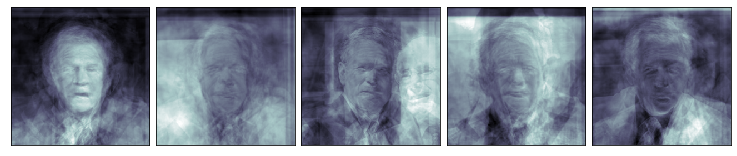

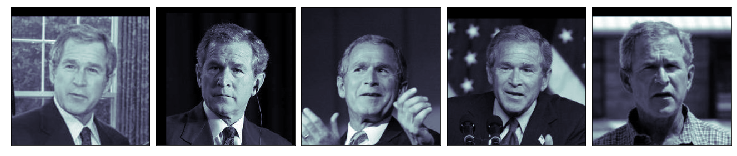

In [ ]:
# Experiment 1: Indicate lowest loss with 53 components
pca_bush = PCA(53) 
X_proj = pca_bush.fit_transform(X_test) 
print(X_proj.shape) 
print(np.cumsum(pca_bush.explained_variance_ratio_))

fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)  
for i in range(5): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pca_bush.components_[i,:], (250,250)), cmap=plt.cm.bone, interpolation='nearest')

X_inv_proj = pca_bush.inverse_transform(X_proj)
X_proj_img = np.reshape(X_inv_proj,(53,250,250))  
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
for i in range(5): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest') 

(53, 30)
[0.2845727  0.3714388  0.4360472  0.48917317 0.5344045  0.5693016
 0.5962815  0.62200224 0.6464449  0.6685762  0.6890719  0.706952
 0.72420263 0.7397464  0.75452906 0.7691622  0.78282636 0.79633313
 0.80807203 0.81943077 0.8298141  0.8397005  0.8492375  0.85836077
 0.86724967 0.8755674  0.8835338  0.89106244 0.89841384 0.9052008 ]


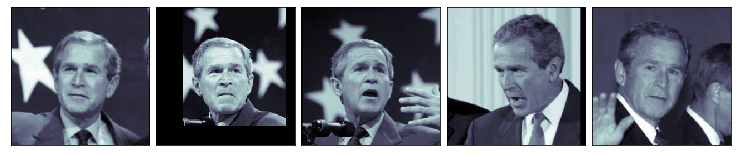

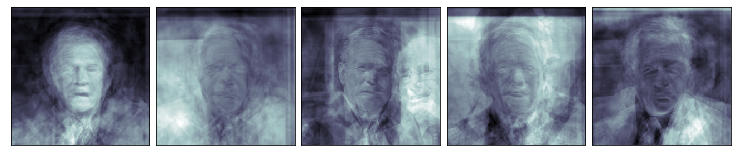

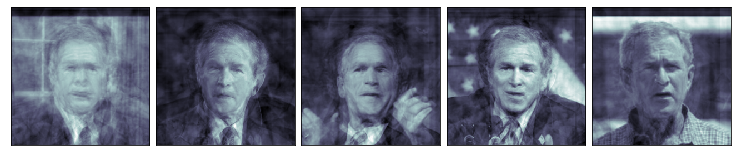

In [ ]:
# Experiment 2: Indicate Higher loss with 30 components
pca_bush = PCA(30) 
X_proj = pca_bush.fit_transform(X_test) 
print(X_proj.shape) 
print(np.cumsum(pca_bush.explained_variance_ratio_))

fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 pixels 
for i in range(5): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest') 
plt.show() 

fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
for i in range(5): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pca_bush.components_[i,:], (250,250)), cmap=plt.cm.bone, interpolation='nearest')

X_inv_proj = pca_bush.inverse_transform(X_proj)
X_proj_img = np.reshape(X_inv_proj,(53,250,250))  
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
for i in range(5): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest') 

(53, 5)
[0.28457284 0.37143892 0.43604743 0.48917344 0.5344049 ]


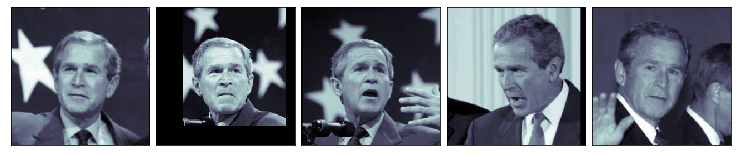

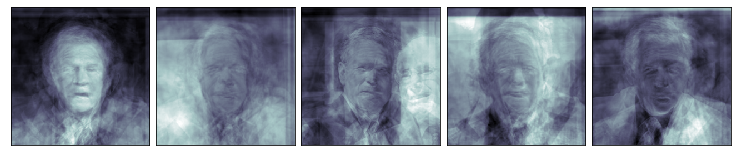

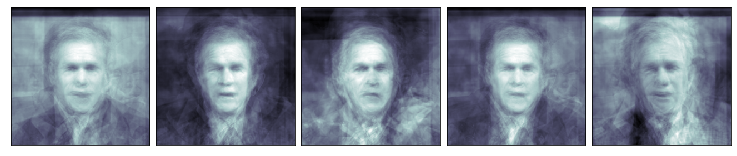

In [ ]:
# Experiment 3: Indicate Higher loss with 5 components
pca_bush = PCA(5) 
X_proj = pca_bush.fit_transform(X_test) 
print(X_proj.shape) 
print(np.cumsum(pca_bush.explained_variance_ratio_))

fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 pixels 
for i in range(5): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest') 
plt.show() 

fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 pixels 
for i in range(5): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pca_bush.components_[i,:], (250,250)), cmap=plt.cm.bone, interpolation='nearest')

X_inv_proj = pca_bush.inverse_transform(X_proj)
X_proj_img = np.reshape(X_inv_proj,(53,250,250))  
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
for i in range(5): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest') 

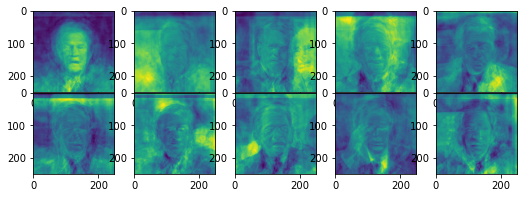

In [ ]:
#Changing the top Eigenvectors
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
faces_pca = PCA(n_components=53)
faces_pca.fit(X_test)
fig, axes = plt.subplots(2,5,figsize=(9,3),gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(250,250),)
    

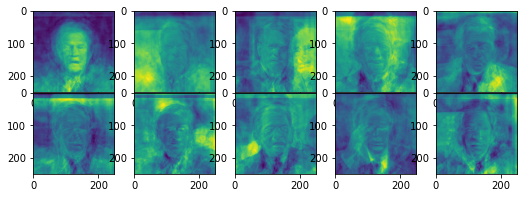

In [ ]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
faces_pca = PCA(n_components=53)
faces_pca.fit(X_test)
fig, axes = plt.subplots(2,5,figsize=(9,3),gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(250,250))

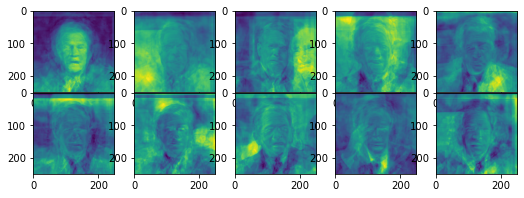

In [ ]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
faces_pca = PCA(n_components=25)
faces_pca.fit(X_test)
fig, axes = plt.subplots(2,5,figsize=(9,3),gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(250,250))

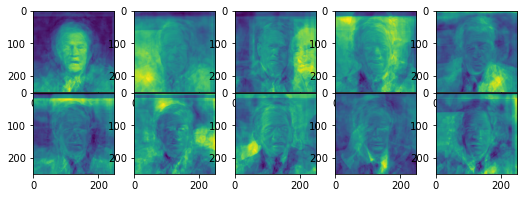

In [ ]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
faces_pca = PCA(n_components=10)
faces_pca.fit(X_test)
fig, axes = plt.subplots(2,5,figsize=(9,3),gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(250,250))